# Sheet 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.stats import norm
import scipy.integrate as integrate
from scipy import interpolate
import sympy as sp
import time

## 2) Random numbers

(b) Inverse Transform Sampling

In [18]:
N = 100000
r = np.random.rand(N)

if r\~f then F(r)\~Uniform dist. between [0, 1]. 
Now we want $G(x)=F(r)$
simplifying: $x=G^{-1}(F(r))$

In [1]:
t0 = time.time()

# TODO: Calculate x following g1
x = r**(1/3)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,1)
plt.hist(x, range=(0,1), bins=100, density=True)
plt.plot(x0, 3*x0**2)
plt.show()

NameError: name 'time' is not defined

TODO: Derive expression for $G^{-1}(F(x))$

In [2]:
t0 = time.time()

# TODO: Calculate x following g2
x = -np.log(r)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, np.exp(-x0))
plt.show()

NameError: name 'time' is not defined

TODO: Derive expression for $G^{-1}(F(x))$

Generated 100000 random numbers in 0.0118 s


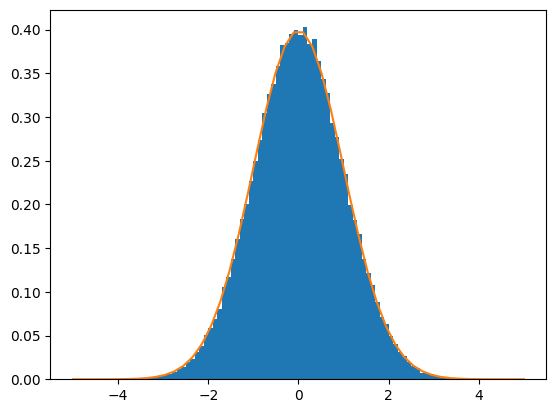

In [21]:
t0 = time.time()

# TODO: Calculate x following g3
x = norm.ppf(r)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

TODO: Derive expression for $G^{-1}(F(x))$

Generated 100000 random numbers in 2.4924 s


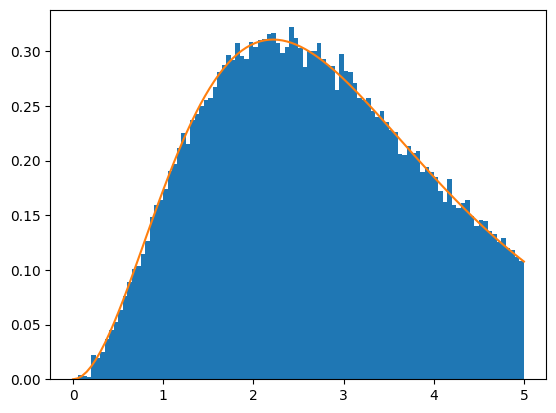

In [22]:
t0 = time.time()

# TODO: Calculate x following g4

def g(x0): # We define the PDF g as a callable object here
    return 2/(3*sp.zeta(3)) * x0**2/(np.exp(x0)+1) / 0.862177

# You do not have to evaluate the zeta function 

x0 = np.linspace(0,5,100)
G = [] #This list stores the value of the CDF G

for n in x0:
    G.append(integrate.quad(g, 0, n)[0]) #For every x0, we find $\int^{x0}_0 g(x)dx$ 

G_inv = interpolate.InterpolatedUnivariateSpline(G,x0) # We use a spline to model $G^{-1}$

x = G_inv(r) # This list stores the 'numerical inverse' of the CDF G
# Now we have the array $x=G^{-1}(F(r))$ 

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

plt.hist(x, range=(0,5), bins=100, density=True, label='x')
plt.plot(x0, 2/(3*sp.zeta(3)) * x0**2/(np.exp(x0)+1) / 0.862177, label='PDF') # correction factor for limited x range
plt.show()

(c) rejection sampling

In [23]:
g_accept = np.random.rand(N)

Generated 33641 random numbers in 0.3893 s


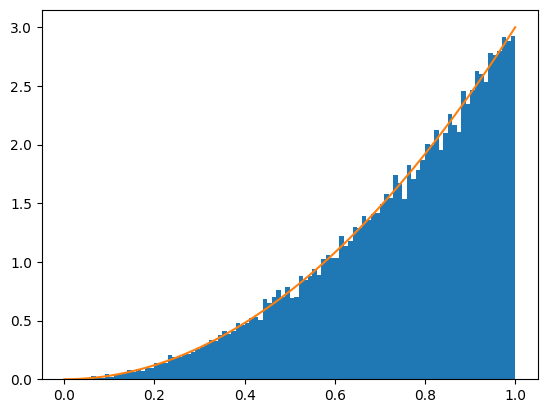

In [35]:
t0 = time.time()

# TODO: Generate random numbers following g1
x_proposal = r
x = []

def target_distribution(x):
    return 3*x**2

for candidate in x_proposal:
    # Calculate acceptance probability
    acceptance_prob = target_distribution(candidate) / 3
    
    # Generate a uniform random number for acceptance
    u = np.random.uniform(0, 1)
    
    # Accept or reject the candidate
    if u < acceptance_prob:
        x.append(candidate)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,1)
plt.hist(x, range=(0,1), bins=100, density=True)
plt.plot(x0, 3*x0**2)
plt.show()

Generated 19737 random numbers in 0.4569 s


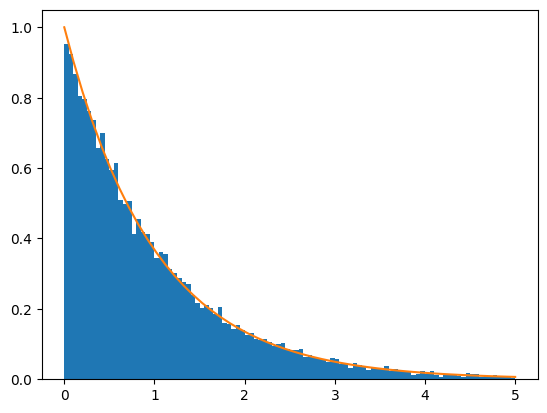

In [36]:
t0 = time.time()

# TODO: Generate random numbers following g2
x_proposal = 5*r
x = []

def target_distribution(x):
    return np.exp(-x)

for candidate in x_proposal:
    # Calculate acceptance probability
    acceptance_prob = target_distribution(candidate)
    
    # Generate a uniform random number for acceptance
    u = np.random.uniform(0, 1)
    
    # Accept or reject the candidate
    if u < acceptance_prob:
        x.append(candidate)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, np.exp(-x0))
plt.show()

Generated 25082 random numbers in 0.5145 s


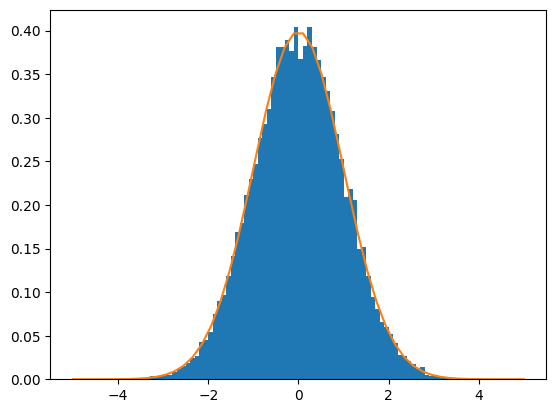

In [39]:
t0 = time.time()

# TODO: Generate random numbers following g3
x_proposal = 10*r -5
x = []

def target_distribution(x):
    return 1/(2*np.pi)**.5 * np.exp(-x**2/2)

for candidate in x_proposal:
    # Calculate acceptance probability
    acceptance_prob = target_distribution(candidate) / 0.4
    
    # Generate a uniform random number for acceptance
    u = np.random.uniform(0, 1)
    
    # Accept or reject the candidate
    if u < acceptance_prob:
        x.append(candidate)

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
Generated 41789 random numbers in 2075.3833 s


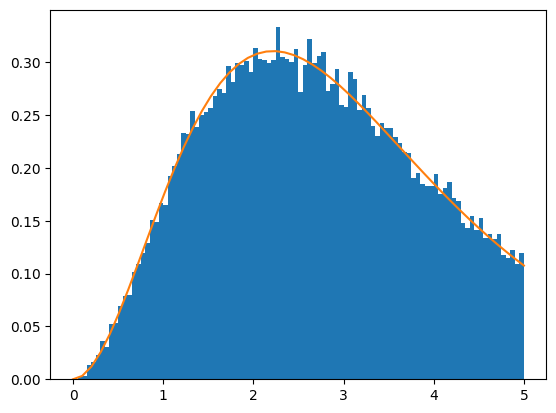

In [47]:
t0 = time.time()

# TODO: Generate random numbers following g4
# You do not have to evaluate the zeta function 
x_proposal = 5*r
x = []

def target_distribution(x):
    return 2/(3*sp.zeta(3)) * x**2/(np.exp(x)+1) / 0.862177

counter=0

for candidate in x_proposal:
    if counter %10000 == 0:
        print(counter)
    counter=counter+1
    # Calculate acceptance probability
    acceptance_prob = target_distribution(candidate) / 0.48
    
    # Generate a uniform random number for acceptance
    u = np.random.uniform(0, 1)
    
    # Accept or reject the candidate
    if u < acceptance_prob:
        x.append(candidate)

t1 = time.time()

print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(0,5)
plt.hist(x, range=(0,5), bins=100, density=True)
plt.plot(x0, 2/(3*sp.zeta(3)) * x0**2/(np.exp(x0)+1) 
         / 0.862177) 
# Note: Need the correction factor 0.862177 = \int_0^5 dx g_4(x) 
# to get the correct normalization

plt.show()

(d) Box-Muller transform

Generated 49999 random numbers in 0.0110 s


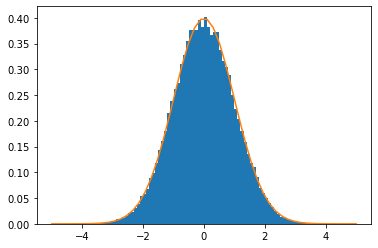

In [13]:
t0 = time.time()

# TODO: Transform r into gaussian random numbers, but fast
x = []

# Generate samples using the Box-Muller transform
x = np.sqrt(-2 * np.log(r[0:49999])) * np.cos(2 * np.pi * r[50000: 99999])

t1 = time.time()
print(f"Generated {len(x)} random numbers in {t1-t0:.4f} s")

x0 = np.linspace(-5,5)
plt.hist(x, range=(-5,5), bins=100, density=True)
plt.plot(x0, 1/(2*np.pi)**.5 * np.exp(-x0**2/2))
plt.show()